Gerard Marrugat

## 1. Gradient descent method

#### 1.1 A simple quadratic function

$$f(x) = x_1^2 + x_2^2$$

The next code performs a contourn plot of $f(x)$ and also draws the gradient of the function. 

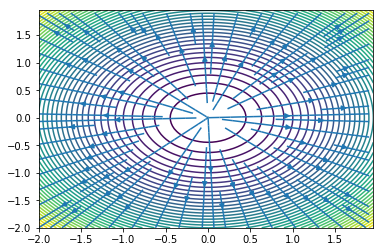

In [11]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
gradx = 2 * X
grady = 2 * Y 

plt.streamplot(X, Y, gradx, grady)

plt.show()

It could be appreciated how the gradient lines goes in the direction where the function value increases at the highest rate. So, in order to find the minimum of $f(x)$ we may follow the opposite direction of the gradient. This algorithm is called the $\textbf{gradient descent}$, and looks as follows:

$$x^{k+1} = x^k - \alpha^k\nabla f(x^k)$$

This algorithm approaches to the minimum of $f(x)$ iteratively. The $\alpha^k$ is the step, and in the next implementations we will consider it constant.

Take an initial point and perform 100 iterations of the gradient descent algorithm. The proposed value for $\alpha^k$ is 0.1.

Gradient Descent algorithm has converged into the point: [8.14814391e-10 6.11110793e-10]


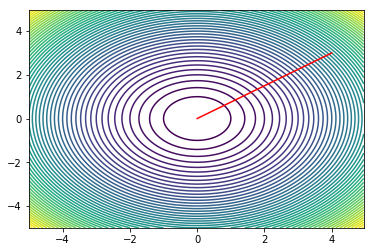

In [3]:
#1

X1 = np.arange(-5, 5, 0.05)
X2 = np.arange(-5, 5, 0.05)
X1, X2 = np.meshgrid(X1, X2)
Z = X1**2 + X2**2 

# Contour plot en 2D

plt.figure()
plt.contour(X1, X2, Z, 50)

X0 = [4,3]
xk_list = []
xk_list.append(X0)
X = np.zeros(2)
alpha = 0.1
k = 100

gradX1 = 2*X0[0]
gradX2 = 2*X0[1]


for i in range(0,k):
    
    gradX1 = 2*X0[0]
    gradX2 = 2*X0[1]
    
    grad = [gradX1,gradX2]
    
    X[0] = X0[0] - alpha*grad[0]
    X[1] = X0[1] - alpha*grad[1]
      
    X0 = X
    xk_list.append(X0)   
    
print('Gradient Descent algorithm has converged into the point:',X0)

xk_list = np.array(xk_list)

plt.plot(xk_list[:,0],xk_list[:,1],'r')


It is observed that indiferently to the chosen initial point, the gradient descent algorithm always converge to the same point, the global minimum of the function $(0,0)$.
Now, an study of different $\alpha$ values is required. The proposed cases are $\alpha^k = 1$ and $\alpha^k = 2$. 

Gradient Descent algorithm has converged into the point: [8.87387286 6.65540465]


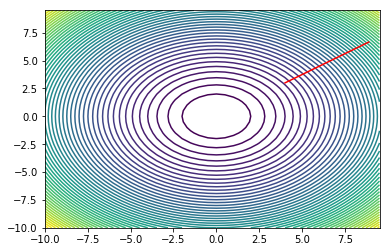

In [4]:
#2

X1 = np.arange(-10, 10, 0.5)
X2 = np.arange(-10, 10, 0.5)
X1, X2 = np.meshgrid(X1, X2)
Z = X1**2 + X2**2 

# Contour plot en 2D

plt.figure()
plt.contour(X1, X2, Z, 50)

X0 = [4,3]
xk_list = []
xk_list.append(X0)
X = np.zeros(2)
alpha = 1.004
k = 100

gradX1 = 2*X0[0]
gradX2 = 2*X0[1]


for i in range(0,k):
    
    gradX1 = 2*X0[0]
    gradX2 = 2*X0[1]
    
    grad = [gradX1,gradX2]
    
    X[0] = X0[0] - alpha*grad[0]
    X[1] = X0[1] - alpha*grad[1]
      
    X0 = X
    xk_list.append(X0)   
    
print('Gradient Descent algorithm has converged into the point:',X0)
xk_list = np.array(xk_list)

plt.plot(xk_list[:,0],xk_list[:,1],'r')


If alpha is greater or equal than 1 the gradient method does not converge into the minimum. Specially when $\alpha > 1$ the algorithm moves to points $x^{k+1}$ where $f(x^{k+1}) > f(x^k)$.

The red path in the above contourn plot shows how the gradient descent moves away from the minimun when $\alpha$ is grater than 1. A value not so bigger than 1 have been selected ($\alpha = 1.004$) because for greater values the red path goes out of the contourn plot.

#### 1.2 The exercise of lab 1

The gradient of $f(x)$:
$$
\nabla f(x) = \left\lgroup \matrix{2x_1^5 - 8.4x_1^3 + 8x_1 + x_2\cr 16x_2^3 - 8x_2 + x_1} \right\rgroup
$$

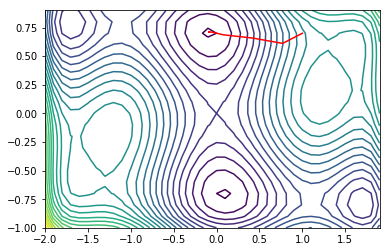

The minimum reached is:  [-0.08984201  0.7126564 ]


In [5]:
#1
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1, X2) #converts X and Y into matrices to plot

F = (X1**2)*(4-2.1*X1**2+(1/3)*X1**4)+X1*X2+(X2**2)*(-4+4*X2**2)

# Contour plot
fig = plt.figure()

plt.contour(X1,X2,F,30)

n_iter = 100
x = np.zeros((n_iter,2))
grad_f = np.zeros((1,2))
x[0,0] = 1.0
x[0,1] = 0.70
alpha = 0.1
#-1.605 -0.57  

for i in range(0,n_iter-1):
    F_dx1 = 2*(x[i,0]**5)-8.4*(x[i,0]**3)+8*x[i,0]+x[i,1]
    F_dx2 = 16*x[i,1]**3-8*x[i,1]+x[i,0]
    grad_f[0,0] = F_dx1
    grad_f[0,1] = F_dx2
    x[i+1,:] = x[i,:] - alpha*grad_f
    
plt.plot(x[:,0],x[:,1],'r')

plt.show()
print('The minimum reached is: ',x[n_iter-1])

We appreciate that depending on the intial point we choose, the algorithm converges to a different minimum, specifically to the nearest local minimum.

In [6]:
#2 Adapting alpha value at each iteration
def Function(xk):
     return ((xk[0]**2)*(4-2.1*xk[0]**2+(1/3)*xk[0]**4)+xk[0]*xk[1]+(xk[1]**2)*(-4+4*xk[1]**2))

def gradient(xk):
    grad_F = [0,0]
    dx1 = 2*(xk[0]**5)-8.4*(xk[0]**3)+8*xk[0]+xk[1]
    dx2 = 16*xk[1]**3-8*xk[1]+xk[0]
    grad_F[0] = float(dx1)
    grad_F[1] = float(dx2)
    
    return grad_F

In [7]:
xk_list = []
xk = [1.0,0.7]
xk_list.append(xk)
x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))

k = 0

while True:

    alpha = 1

    while(Function(x_candidate) >= Function(xk)):
        print('%s is the value at %s'%(Function(x_candidate),x_candidate))
        print('%s is the value at %s'%(Function(xk),xk))

        alpha = alpha/2
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
    
    xk_list.append(x_candidate.tolist())
    xk = x_candidate
    x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
    k+=1
    
    if abs((Function(x_candidate) - Function(xk)))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((Function(x_candidate)-Function(xk))))
        break
        
print('Number of steps needed to converge:',k)
print('The minimum reached is: ',x_candidate)


45.63944197991866 is the value at [-2.70767963  1.07762885]
1.2374270575459074 is the value at [0.77   0.6112]
0.8238893887553305 is the value at [-0.48156565 -0.11028915]
0.5434712680834726 is the value at [-0.96883982  0.84441442]
0.8238893887553305 is the value at [-0.48156565 -0.11028915]
0.5434712680834726 is the value at [-0.96883982  0.84441442]
0.8388027677598098 is the value at [-0.72520273  0.36706264]
0.5434712680834726 is the value at [-0.96883982  0.84441442]
69.6413229141874 is the value at [ 1.66430846 -2.17922456]
-0.055166558982049696 is the value at [-0.60479683  0.87284057]
7.015263489154009 is the value at [-0.6799752  -1.30131183]
-0.35997942990576903 is the value at [ 0.52975582 -0.653192  ]
7.015263489154009 is the value at [-0.6799752  -1.30131183]
-0.35997942990576903 is the value at [ 0.52975582 -0.653192  ]
-0.07592227143640032 is the value at [-0.07510969 -0.97725191]
-0.35997942990576903 is the value at [ 0.52975582 -0.653192  ]
82.15269355895455 is the val

The backtracking algorithm is faster regarding to converge, the alpha computation makes the process faster while searching where the function value is minimum. Which could be thought as less operations inside our code. However, in comparison when the step is constant and the number of repetitions defined, the location of the minimum is less precise.
Let´s provide an example. According to the previous laboratory, there is a minimum at $(-0.09 , 0.715)$. Starting from $(1.0 , 0.7)$, when alpha is static, the reached minimum is $(-0.08984201 , 0.7126564)$, and when the alpha is computed at each iteration a minimum is found at $(-0.06142233 , 0.71863056)$.

#### 1.3 The Rosenbrock function

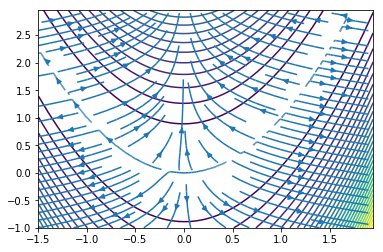

In [29]:
#1
def rosenbrock(a,b,X1,X2):
    return(((a-X1)**2) + (b*(X2 - X1**2)**2))

X1 = np.arange(-1.5, 2.0, 0.05)
X2 = np.arange(-1.0, 3.0, 0.05)
X1, X2 = np.meshgrid(X1, X2)
a = 1
b = 100
R = rosenbrock(a,b,X1,X2)

# Contour plot en 2D

plt.figure()
plt.contour(X1, X2, R, 30)

# Compute gradient 

X1 = np.arange(-1.5, 2.0, 0.1)
X2 = np.arange(-1.0, 3.0, 0.1)
X1, X2 = np.meshgrid(X1, X2)
gradX1 = 2*(X1-a+2*b*(X1**3)-2*b*X2*X1)
gradX2 = 2*b*(X2-X1**2)

plt.streamplot(X1, X2, gradX1, gradX2)

plt.show()

The gradient of a function points to the direction where the function value increases at the highest rate. In the previous plot, the gradient lines point out of the parabolic valley.


Iteration  0

Iteration  1

284984034.23026 is the value at [-41.51556396  35.40039062]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

16042986.242530879 is the value at [-20.45309448  17.79785156]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

800190.8355148956 is the value at [-9.92185974  8.99658203]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

29220.50511189237 is the value at [-4.65624237  4.59594727]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

297.68369106390236 is the value at [-2.02343369  2.39562988]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

66.20881420368585 is the value at [-0.70702934  1.29547119]
3.251081705093384 is the value at [0.609375  0.1953125]
We still computing alpha

56.30609054357977 is the value at [-0.04882717  0.74539185]
3.251081705093384 is the value at [0.609375  0.1953125]

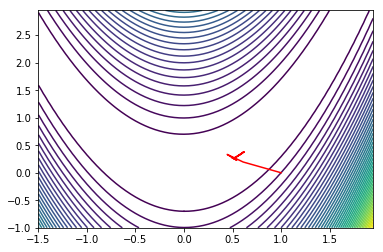

In [30]:
#2
def grad_rosenbrock(X1,X2):
    
    grad =[0,0]
    gradX1 = 2*(X1-a+2*b*(X1**3)-2*b*X2*X1)
    gradX2 = 2*b*(X2-X1**2)
    grad[0] = float(gradX1)
    grad[1] = float(gradX2)
    
    return(grad)

X1 = np.arange(-1.5, 2.0, 0.05)
X2 = np.arange(-1.0, 3.0, 0.05)
X1, X2 = np.meshgrid(X1, X2)

xk_list = []
xk = [1.0,0.0]
#[1.0,0.7]
#[0.0,0.0]
#[1.0,1.0]
#[0.9,0.9]
#0.0,1.9]

xk_list.append(xk)
x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(xk[0],xk[1])))

k = 0

while True:

    alpha = 1
    print('\nIteration ',k)
    while(rosenbrock(a,b,x_candidate[0],x_candidate[1]) >= rosenbrock(a,b,xk[0],xk[1])):
        
        print('\n%s is the value at %s'%(rosenbrock(a,b,x_candidate[0],x_candidate[1]),x_candidate))
        print('%s is the value at %s'%(rosenbrock(a,b,xk[0],xk[1]),xk))
        print('We still computing alpha')

        alpha = alpha/2
        x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(xk[0],xk[1])))
        
    
    xk_list.append(x_candidate.tolist())
    xk = x_candidate
    x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(xk[0],xk[1])))
    k+=1
    
    if abs((rosenbrock(a,b,x_candidate[0],x_candidate[1]) - rosenbrock(a,b,xk[0],xk[1])))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((rosenbrock(a,b,x_candidate[0],x_candidate[1]) - rosenbrock(a,b,xk[0],xk[1]))))
        break
        
print('Number of steps needed to converge:',k)
print('The minimum reached is: ',x_candidate)

xk_list = np.array(xk_list)

plt.figure()
plt.contour(X1, X2, R, 50)
plt.plot(xk_list[:,0],xk_list[:,1],'r')

After trying the algorithm with different starting points it could be appreciated that the backtracking algorithm is not able to converge to the minimum of the function. It is due to the presence of points that also accomplish the condition $\vert   f(x^{k+1}) - f(x^{k}) \vert < 10^{-3}$. All these points are located in the long parabolic shaped valley clearly observed in the previous contourn plot. Even if the starting point is so close to $(1.0,1.0)$ (for example $(0.9,0.9)$) the algorithm can not reach the global minimum at $(1,1)$.    

## 2. Newton descent method

#### 2.1 A simple quadratic function

$$f(x) = 100x_1^2 + x_2^2$$

1. First, we are going to minimize the previous function using the gradient descent algorithm.

In [10]:
def Function(xk):
     return ((100*xk[0]**2) + xk[1]**2)

def gradient(xk):
    grad_F = [0,0]
    dx1 = 200*xk[0]
    dx2 = 2*xk[1]
    grad_F[0] = float(dx1)
    grad_F[1] = float(dx2)
    
    return grad_F

xk_list_grad = []
xk = [1.0,0.7]
xk_list_grad.append(xk)
alpha = 1
x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))

k = 0

while True:

    alpha = 1

    while(Function(x_candidate) >= Function(xk)):
        print('%s is the value at %s'%(Function(x_candidate),x_candidate))
        print('%s is the value at %s'%(Function(xk),xk))

        alpha = alpha/2
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
    
    xk_list_grad.append(x_candidate.tolist())
    xk = x_candidate
    x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
    k+=1
    
    if abs((Function(x_candidate) - Function(xk)))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((Function(x_candidate)-Function(xk))),'< 0.001')
        break
        
print('Number of steps needed to converge with gradient descent method is:',k)
print('The minimum reached is: ',x_candidate)


3960100.49 is the value at [-199.    -0.7]
100.49 is the value at [1.0, 0.7]
980100.0 is the value at [-99.   0.]
100.49 is the value at [1.0, 0.7]
240100.1225 is the value at [-49.     0.35]
100.49 is the value at [1.0, 0.7]
57600.275625 is the value at [-24.      0.525]
100.49 is the value at [1.0, 0.7]
13225.37515625 is the value at [-11.5      0.6125]
100.49 is the value at [1.0, 0.7]
2756.6806640625 is the value at [-5.25     0.65625]
100.49 is the value at [1.0, 0.7]
452.022353515625 is the value at [-2.125     0.678125]
100.49 is the value at [1.0, 0.7]
396457.6149315172 is the value at [-62.96484375  -0.6782959 ]
10.471376829743384 is the value at [0.31640625 0.6782959 ]
98120.66802978516 is the value at [-31.32421875   0.        ]
10.471376829743384 is the value at [0.31640625 0.6782959 ]
24037.225922210364 is the value at [-15.50390625   0.33914795]
10.471376829743384 is the value at [0.31640625 0.6782959 ]
5766.762704245783 is the value at [-7.59375     0.50872192]
10.471376

We have used the backtracking algorithm to compute the $\alpha$ at each step. 

Starting from $x_0 = (1.0,0.7)$ we have reach the minimum at $(0.0056808, 0.16757547)$ after $59$ steps.

2. In this second implementation we are going to use a new algorithm to minimize the function $f(x)$:

$$x^{k+1}=x^k + \alpha^kd^k$$

Where $d^k$ is the descent direction and $\alpha$ is the already known step value. $d^k$ is defined as follows:

$$d^k = - (\nabla^2f(x^k))^{-1}\nabla f(x^k)$$

In [11]:
def grad_2(xk):
    grad_2_F = np.zeros((2,2))
    dx1dx1 = 200
    dx2dx2 = 2
    dx1dx2 = 0
    dx2dx1 = 0
    grad_2_F[0,0] = float(dx1dx1)
    grad_2_F[0,1] = float(dx1dx2)
    grad_2_F[1,0] = float(dx2dx1)
    grad_2_F[1,1] = float(dx2dx2)
    
    return grad_2_F

def d_func(xk):
    
    d = -1*np.dot(np.linalg.inv(grad_2(xk)),gradient(xk))
    
    return d
    

xk_list_newton = []
xk = [1,0.7]
xk_list_newton.append(xk)
alpha = 1
x_candidate = np.add(xk,alpha*d_func(xk))

k = 0

while True:

    alpha = 1

    while(Function(x_candidate) >= Function(xk)):
        print('%s is the value at %s'%(Function(x_candidate),x_candidate))
        print('%s is the value at %s'%(Function(xk),xk))

        alpha = alpha/2
        x_candidate = np.add(xk,alpha*d_func(xk))
        
    
    xk_list_newton.append(x_candidate.tolist())
    xk = x_candidate
    x_candidate = np.add(xk,alpha*d_func(xk))
    k+=1
    
    if abs((Function(x_candidate) - Function(xk)))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((Function(x_candidate)-Function(xk))),'< 0.001')
        break
        
print('Number of steps needed to converge with Newton´s method is:',k)
print('The minimum reached is: ',x_candidate)

Stopping criterion is satisfied:  0.0 < 0.001
Number of steps needed to converge with Newton´s method is: 1
The minimum reached is:  [0. 0.]


Using the Newton descent method we reached the minimum at $(0,0)$ in one step.

This fact is not a coincidence, it has an explanation. 

Our function is a quadratic function defined like this:

$$ f(x) = a + b^Tx + \frac{1}{2}x^TQx$$

Note that $\nabla^2 f(x) = Q$ is constant.
Let $x^0$ an arbitrary starting point and $x^*$ the minimum of $f(x)$. Then:

$$\nabla f(x^0) = Qx^0 + b$$ 
$$\nabla f(x^*) = Qx^* + b$$ 
and we know that $\nabla f(x) = 0$, so
$$Qx^* + b = 0$$

From these equations we obtain the next equivalences:

$$x^0 = Q^{-1}\nabla f(x^0) - Q^{-1}b$$
$$x^* = -Q^{-1}b$$ 

Then,
$$x^0 = Q^{-1}\nabla f(x^0) + x^*$$

And finally,
$$x^* = x^0 - (\nabla^2 f(x^0))^{-1}\nabla f(x^0)$$

Which is the first iteration of Newton´s method starting at $x^0$ when $\alpha = 1$ (the case we are studying)

3. Compare the number of iterations that are needed to get to the minimum. It may be interesting
to plot the path that each of the method follows.

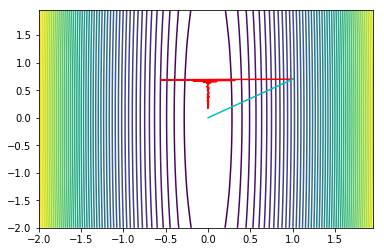

In [12]:

X1 = np.arange(-2.0, 2.0, 0.05)
X2 = np.arange(-2.0, 2.0, 0.05)
X1, X2 = np.meshgrid(X1, X2)
F = 100*X1**2+X2**2

plt.contour(X1,X2,F,50)

xk_list_grad = np.array(xk_list_grad)
xk_list_newton = np.array(xk_list_newton)

plt.plot(xk_list_grad[:,0],xk_list_grad[:,1],'r')
plt.plot(xk_list_newton[:,0],xk_list_newton[:,1],'c')

#### 2.2 The exercise of lab 1

We are going to focus on the function studied in lab 1
$$f(x_1,x_2) = x_1^2(4-2.1x_1^2+\frac{1}{3}x_1^4)+x_1x_2+x_2^2(-4+4x_2^2)$$

This function has six local minimums:
$(-1.705, 0.795)$,
$(-1.605, -0.57 )$,
$(-0.09,   0.715)$,
$( 0.09,  -0.715)$,
$(1.605,   0.57 )$ and
$(1.705, -0.795)$

Using combined gradient-Newton method

Stopping criterion is satisfied:  3.0696943357222395e-06 < 0.001
Number of steps needed to converge with gradient-Newton method is: 5
The minimum reached is:  [-1.70360675  0.79608404]


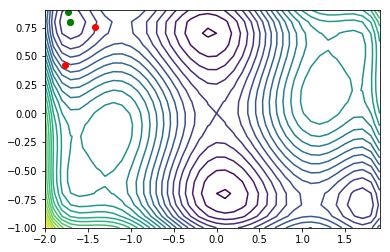

In [13]:
#1
#Using Newton´s method
def func_lab1(xk):
    
    return((xk[0]**2)*(4-2.1*xk[0]**2+(1/3)*xk[0]**4)+xk[0]*xk[1]+(xk[1]**2)*(-4+4*xk[1]**2))

def gradient(xk):
    grad_F = [0,0]
    dx1 = 2*(xk[0]**5)-8.4*(xk[0]**3)+8*xk[0]+xk[1]
    dx2 = 16*xk[1]**3-8*xk[1]+xk[0]
    grad_F[0] = float(dx1)
    grad_F[1] = float(dx2)
    
    return grad_F

def grad_2(xk):
    grad_2_F = np.zeros((2,2))
    dx1dx1 = 10*xk[0]**4-25.2*(xk[0]**2)+8
    dx2dx2 = 48*xk[1]**2-8
    dx1dx2 = 1
    dx2dx1 = 1
    grad_2_F[0,0] = float(dx1dx1)
    grad_2_F[0,1] = float(dx1dx2)
    grad_2_F[1,0] = float(dx2dx1)
    grad_2_F[1,1] = float(dx2dx2)
    
    return grad_2_F

def d_func(xk):
    
    d = -1*np.dot(np.linalg.inv(grad_2(xk)),gradient(xk))
    
    return d

X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1, X2) #converts X and Y into matrices to plot

F = (X1**2)*(4-2.1*X1**2+(1/3)*X1**4)+X1*X2+(X2**2)*(-4+4*X2**2)

# Contour plot
fig = plt.figure()

plt.contour(X1,X2,F,30)

xk_list_newton = []
xk = [-1.25,1]
alpha = 1

k = 0

while True:

    alpha = 1
    
    Hessian = grad_2(xk)
    
    #To see if the Hessian matrix is definite positive we use the condition that 
    #all its principle minors should be positive
    
    M1 = 10*xk[0]**4-25.2*(xk[0]**2)+8
    M2 = (10*xk[0]**4-25.2*(xk[0]**2)+8)*(48*xk[1]**2-8)-1
    
    if((M1>0)&(M2>0)):
        
        x_candidate = np.add(xk,alpha*d_func(xk))
        
        while(func_lab1(x_candidate) >= func_lab1(xk)):
           # print('%s is the value at %s'%(Function(x_candidate),x_candidate))
           # print('%s is the value at %s'%(Function(xk),xk))

            alpha = alpha/2
            x_candidate = np.add(xk,alpha*d_func(xk))
        
        xk = x_candidate
        x_candidate = np.add(xk,alpha*d_func(xk))
        plt.plot(x_candidate[0],x_candidate[1],'go')
        
    else: 
        
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
        while(func_lab1(x_candidate) >= func_lab1(xk)):
           # print('%s is the value at %s'%(Function(x_candidate),x_candidate))
           # print('%s is the value at %s'%(Function(xk),xk))

            alpha = alpha/2
            x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
        xk = x_candidate
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        plt.plot(x_candidate[0],x_candidate[1],'ro')
        
    k+=1
    
    if abs((func_lab1(x_candidate) - func_lab1(xk)))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((func_lab1(x_candidate)-func_lab1(xk))),'< 0.001')
        break
        
print('Number of steps needed to converge with gradient-Newton method is:',k)
print('The minimum reached is: ',x_candidate)

In the last plot red dots are the next chosen points using gradient descent, and the greens are the ones chosen using Newton´s method. We could appreciate that near the minimum Newton´s method is mostly used. 

3. Now, compare the pure gradient descent method with the Newton´s method. <br>

To do that we have plot the path followed by each method to reach the minimum.

Stopping criterion is satisfied:  2.5757174171303632e-14 < 10e-10
Number of steps needed to converge with Newton´s method is: 5
The minimum reached is:  [1.60710475 0.56865145]
Stopping criterion is satisfied:  5.074751729949867e-11 < 10e-10
Number of steps needed to converge with gradient method is: 14
The minimum reached is:  [ 1.70360698 -0.79608263]


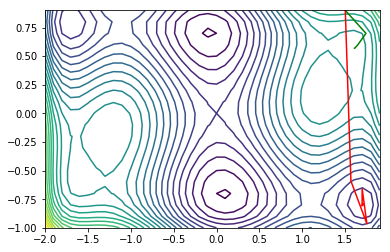

In [30]:

X1 = np.arange(-2, 2, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1, X2) #converts X and Y into matrices to plot

F = (X1**2)*(4-2.1*X1**2+(1/3)*X1**4)+X1*X2+(X2**2)*(-4+4*X2**2)

# Contour plot
fig = plt.figure()

plt.contour(X1,X2,F,30)

xk_list_newton = []
xk = [1.5,0.9]
#[-0.6,0.25]
##[-1,-1]
xk_list_newton.append(xk)
alpha = 1

k = 0

while True:

    alpha = 1
    
    Hessian = grad_2(xk)
    
    #To see if the Hessian matrix is definite positive we use the condition that 
    #all its principle minors should be positive
    
    M1 = 10*xk[0]**4-25.2*(xk[0]**2)+8
    M2 = (10*xk[0]**4-25.2*(xk[0]**2)+8)*(48*xk[1]**2-8)-1
    
    if((M1>0)&(M2>0)):
        
        x_candidate = np.add(xk,alpha*d_func(xk))
        
        while(func_lab1(x_candidate) >= func_lab1(xk)):
           # print('%s is the value at %s'%(Function(x_candidate),x_candidate))
           # print('%s is the value at %s'%(Function(xk),xk))

            alpha = alpha/2
            x_candidate = np.add(xk,alpha*d_func(xk))
        
        xk_list_newton.append(x_candidate)
        xk = x_candidate
        x_candidate = np.add(xk,alpha*d_func(xk))
        
        
    else: 
        
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
        while(func_lab1(x_candidate) >= func_lab1(xk)):
           # print('%s is the value at %s'%(Function(x_candidate),x_candidate))
           # print('%s is the value at %s'%(Function(xk),xk))

            alpha = alpha/2
            x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
        xk_list_newton.append(x_candidate)
        xk = x_candidate
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
        
    k+=1
    
    if abs((func_lab1(x_candidate) - func_lab1(xk)))<(10**-10):
        print('Stopping criterion is satisfied: ',abs((func_lab1(x_candidate)-func_lab1(xk))),'< 10e-10')
        break
        
xk_list_newton = np.array(xk_list_newton)
plt.plot(xk_list_newton[:,0],xk_list_newton[:,1],'g')
print('Number of steps needed to converge with Newton´s method is:',k)
print('The minimum reached is: ',x_candidate)


xk_list_grad = []
xk = [1.5,0.9]
#[-0.6,0.25]
#[-1,-1]
xk_list_grad.append(xk)
alpha = 1

k = 0

while True:

    alpha = 1
     
    x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
    while(func_lab1(x_candidate) >= func_lab1(xk)):
        # print('%s is the value at %s'%(Function(x_candidate),x_candidate))
        # print('%s is the value at %s'%(Function(xk),xk))

        alpha = alpha/2
        x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
    xk_list_grad.append(x_candidate.tolist())
    xk = x_candidate
    x_candidate = np.subtract(xk,alpha*np.array(gradient(xk)))
        
    k+=1
    
    if abs((func_lab1(x_candidate) - func_lab1(xk)))<(10**-10):
        print('Stopping criterion is satisfied: ',abs((func_lab1(x_candidate)-func_lab1(xk))),'< 10e-10')
        break

xk_list_grad = np.array(xk_list_grad)
plt.plot(xk_list_grad[:,0],xk_list_grad[:,1],'r')
print('Number of steps needed to converge with gradient method is:',k)
print('The minimum reached is: ',x_candidate)

Comparing the two paths, we clearly observe that they converge into different minimums. Starting from the point $(1.5,0.9)$, Newton´s method (green line) converges to the nearest minimum $(1.605,0.57)$ in just five steps. Meanwhile, initializing the gradient descent algorithm from the same starting point, it arrives to the minimum located at $(1.705, -0.795)$ in fourteen steps. In the light of these results, two conclusions could be obtained:

(1) Newton´s method requires generally less iterations to reach a minimum than the gradient descent.
(2) The direction taken by the Newton´s method is better than the gradient one,even if it is not the ideal direction, because the algorithm converges to the closest minimum.

#### 2.3 The Rosenbrock function

Stopping criterion is satisfied:  0.0005644216807195191 < 0.001
Number of steps needed to converge with Newton´s method is: 7
Times used gradient descent: 0
Times used Newton´s method: 7
The minimum reached is:  [0.99730246 0.99418354]


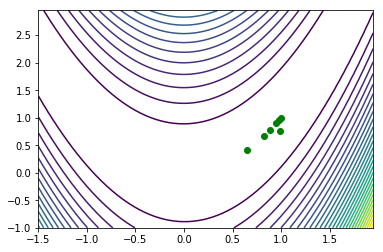

In [56]:
def rosenbrock(a,b,X1,X2):
    return(((a-X1)**2) + (b*(X2 - X1**2)**2))

def grad_rosenbrock(a,b,X1,X2):
    
    grad =[0,0]
    gradX1 = 2*(X1-a+2*b*(X1**3)-2*b*X2*X1)
    gradX2 = 2*b*(X2-X1**2)
    grad[0] = float(gradX1)
    grad[1] = float(gradX2)
    
    return(grad)

def grad_2_rosenbrock(a,b,X1,X2):
    grad_2_rosen = np.zeros((2,2))
    dx1dx1 = 2+12*b*(X1**2)-4*b*X2
    dx2dx2 = 2*b
    dx1dx2 = -4*b*X1
    dx2dx1 = -4*b*X1
    grad_2_rosen[0,0] = float(dx1dx1)
    grad_2_rosen[0,1] = float(dx1dx2)
    grad_2_rosen[1,0] = float(dx2dx1)
    grad_2_rosen[1,1] = float(dx2dx2)
    
    return grad_2_rosen

def d_func(xk):
    
    d = -1*np.dot(np.linalg.inv(grad_2_rosenbrock(a,b,xk[0],xk[1])),grad_rosenbrock(a,b,xk[0],xk[1]))
    
    return d

X1 = np.arange(-1.5, 2.0, 0.05)
X2 = np.arange(-1.0, 3.0, 0.05)
X1, X2 = np.meshgrid(X1, X2)
a = 1
b = 100
R = rosenbrock(a,b,X1,X2)

# Contour plot en 2D

plt.figure()
plt.contour(X1, X2, R, 30)

xk_list = []
xk = [0.5,0.0]
#[1.0,0.7]
#[0.0,0.0]
#[1.0,1.0]
#[0.9,0.9]
#0.0,1.9]
alpha = 1

a=1
b=100


xk_list.append(xk)
x_candidate = np.add(xk,alpha*d_func(xk))

k = 0
n = 0
g = 0

while True:

    alpha = 1
    
    Hessian = grad_2_rosenbrock(a,b,xk[0],xk[1])
    
    #To see if the Hessian matrix is definite positive we use the condition that 
    #all its principle minors should be positive
    
    M1 = Hessian[0,0]
    M2 = Hessian[0,0]*Hessian[1,1] - Hessian[1,0]*Hessian[0,1]
    
    if((M1>0)&(M2>0)):
        
        x_candidate = np.add(xk,alpha*d_func(xk))
        n +=1
        
        while(rosenbrock(a,b,x_candidate[0],x_candidate[1]) >= rosenbrock(a,b,xk[0],xk[1])):
            
            #print('%s is the value at %s'%(rosenbrock(a,b,x_candidate[0],x_candidate[1]),x_candidate))
            #print('%s is the value at %s'%(rosenbrock(a,b,xk[0],xk[1]),xk))

            alpha = alpha/2
            x_candidate = np.add(xk,alpha*d_func(xk))
        
        xk = x_candidate
        x_candidate = np.add(xk,alpha*d_func(xk))
        plt.plot(x_candidate[0],x_candidate[1],'go')
        
    else: 
        
        x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(a,b,xk[0],xk[1])))
        g+=1
        
        while(rosenbrock(a,b,x_candidate[0],x_candidate[1]) >= rosenbrock(a,b,xk[0],xk[1])):
            #print('%s is the value at %s'%(rosenbrock(a,b,x_candidate[0],x_candidate[1]),x_candidate))
            #print('%s is the value at %s'%(rosenbrock(a,b,xk[0],xk[1]),xk))

            alpha = alpha/2
            x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(a,b,xk[0],xk[1])))
        
        xk = x_candidate
        x_candidate = np.subtract(xk,alpha*np.array(grad_rosenbrock(a,b,xk[0],xk[1])))
        plt.plot(x_candidate[0],x_candidate[1],'ro')
        
    k+=1
    
    if abs((rosenbrock(a,b,x_candidate[0],x_candidate[1]) - rosenbrock(a,b,xk[0],xk[1])))<(10**-3):
        print('Stopping criterion is satisfied: ',abs((rosenbrock(a,b,x_candidate[0],x_candidate[1])-rosenbrock(a,b,xk[0],xk[1]))),'< 0.001')
        break
        
print('Number of steps needed to converge with Newton´s method is:',k)
print('Times used gradient descent:',g)
print('Times used Newton´s method:',n)
print('The minimum reached is: ',x_candidate)

Green points on the previous plot correspond to the Newton´s method iterations and, as it could be appreciated, no gradient descent iterations are used in this case (red points).
Starting from $(1,0)$,same initial point as in the previous Rosenbrock study, 10 iterations are needed to arrive to the minimum, in front of the 65 steps taken with gradient descent to approach to the point $(0.61635416, 0.38164276)$, which is the first location that accomplish the stopping criterion $|f(x^{k+1})-f(x^k)| < 10^{-3}$